# WeatherPy

### Import Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})
weather_df

print("""
--------------------------------------------------------------------------------
                            Beginning Data Retrieval
--------------------------------------------------------------------------------
""")

count = 1
for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        city_country = weather_json["sys"]["country"]
        city_latitude = weather_json["coord"]["lat"]
        city_longitude = weather_json["coord"]["lon"]
        city_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        city_max_temperature = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_windspeed = weather_json["wind"]["speed"]
        city_cloud = weather_json["clouds"]["all"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Latitude":city_latitude,
            "Longitude":city_longitude,
            "Date":city_date,
            "Temperature":city_max_temperature, 
            "Humidity":city_humidity,
            "Wind Speed":city_windspeed,
            "Clouds":city_cloud
        }, ignore_index=True)
        
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


--------------------------------------------------------------------------------
                            Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | itiuba
Insufficient data. Skipping..
Processing Record 6 of Set 1 | joensuu
Processing Record 7 of Set 1 | saleaula
Insufficient data. Skipping..
Processing Record 7 of Set 1 | acapulco
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | ostuni
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | arraial do cabo
Proces

Processing Record 162 of Set 1 | lompoc
Processing Record 163 of Set 1 | limoges
Processing Record 164 of Set 1 | georgetown
Processing Record 165 of Set 1 | srednekolymsk
Processing Record 166 of Set 1 | valleyview
Processing Record 167 of Set 1 | orlandia
Processing Record 168 of Set 1 | laguna
Processing Record 169 of Set 1 | prince rupert
Processing Record 170 of Set 1 | brufut
Processing Record 171 of Set 1 | lazaro cardenas
Processing Record 172 of Set 1 | contamana
Processing Record 173 of Set 1 | gushikawa
Processing Record 174 of Set 1 | esperance
Processing Record 175 of Set 1 | skoczow
Processing Record 176 of Set 1 | mariental
Processing Record 177 of Set 1 | souillac
Processing Record 178 of Set 1 | kamenka
Processing Record 179 of Set 1 | stornoway
Insufficient data. Skipping..
Processing Record 179 of Set 1 | bocas del toro
Processing Record 180 of Set 1 | baracoa
Processing Record 181 of Set 1 | suruc
Processing Record 182 of Set 1 | wattegama
Processing Record 183 of S

Processing Record 333 of Set 1 | arani
Processing Record 334 of Set 1 | coquimbo
Processing Record 335 of Set 1 | madang
Processing Record 336 of Set 1 | kirgiz-miyaki
Processing Record 337 of Set 1 | ambagarh chauki
Processing Record 338 of Set 1 | rensvik
Processing Record 339 of Set 1 | alugan
Processing Record 340 of Set 1 | alyangula
Processing Record 341 of Set 1 | ahipara
Processing Record 342 of Set 1 | bria
Processing Record 343 of Set 1 | ginda
Processing Record 344 of Set 1 | mithi
Processing Record 345 of Set 1 | caxito
Processing Record 346 of Set 1 | port moresby
Processing Record 347 of Set 1 | vigrestad
Processing Record 348 of Set 1 | whitehorse
Processing Record 349 of Set 1 | mrirt
Insufficient data. Skipping..
Processing Record 349 of Set 1 | thinadhoo
Processing Record 350 of Set 1 | bengkulu
Insufficient data. Skipping..
Processing Record 350 of Set 1 | yertarskiy
Processing Record 351 of Set 1 | berdigestyakh
Processing Record 352 of Set 1 | san quintin
Processin

Processing Record 516 of Set 1 | bloemfontein
Processing Record 517 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 518 of Set 1 | gawler
Processing Record 519 of Set 1 | xiangxiang
Processing Record 520 of Set 1 | kungurtug
Processing Record 521 of Set 1 | havre-saint-pierre
Processing Record 522 of Set 1 | mount gambier
Processing Record 523 of Set 1 | nemuro
Processing Record 524 of Set 1 | pochutla
Processing Record 525 of Set 1 | namatanai
Processing Record 526 of Set 1 | burns lake
Processing Record 527 of Set 1 | port hardy
Processing Record 528 of Set 1 | nikolayevsk-na-amure
Processing Record 529 of Set 1 | bilma
Processing Record 530 of Set 1 | katherine
Processing Record 531 of Set 1 | belyy yar
Processing Record 532 of Set 1 | sao gabriel da cachoeira
Processing Record 533 of Set 1 | saint-ambroise
Processing Record 534 of Set 1 | alveringem
Processing Record 535 of Set 1 | bujumbura
Processing Record 536 of Set 1 | husavik
Processing Record 537 of Set 1 | ukiah
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,pevek,RU,69.70,170.27,2019-04-18,17.30,80.0,12.37,96.0
1,jamestown,AU,-33.21,138.60,2019-04-18,82.01,23.0,13.80,7.0
2,college,US,64.86,-147.80,2019-04-18,32.00,80.0,3.36,90.0
3,castro,CL,-42.48,-73.76,2019-04-18,48.20,93.0,5.82,20.0
4,new norfolk,AU,-42.78,147.06,2019-04-18,57.00,62.0,9.17,20.0
5,joensuu,FI,62.60,29.76,2019-04-18,30.99,80.0,4.63,0.0
6,acapulco,MX,16.86,-99.88,2019-04-18,78.80,83.0,10.29,20.0
7,tasiilaq,GL,65.61,-37.64,2019-04-18,37.40,74.0,10.29,94.0
8,ushuaia,AR,-54.81,-68.31,2019-04-18,35.60,69.0,8.05,75.0
9,airai,TL,-8.93,125.41,2019-04-18,79.56,60.0,5.01,0.0


In [5]:
# Export to CSV
weather_df.to_csv(r'cities.csv')

In [6]:
# Describe DataFrame
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Clouds
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,20.869617,16.788725,59.010310,69.020036,8.115902,45.426230
std,33.405247,89.372825,22.273479,21.875843,5.662297,38.599201
min,-54.810000,-179.170000,-15.880000,5.000000,0.250000,0.000000
25%,-5.200000,-60.700000,45.000000,57.000000,3.940000,1.000000
50%,24.730000,19.910000,63.630000,74.000000,6.930000,40.000000
75%,50.230000,97.530000,77.200000,86.000000,11.410000,82.000000
max,78.220000,179.320000,96.800000,100.000000,44.600000,100.000000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

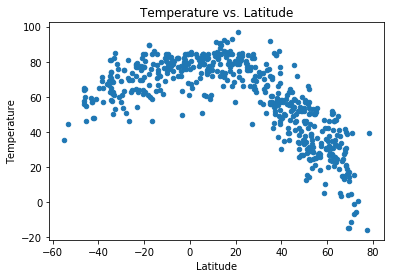

In [7]:
lat_tmp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='Temperature vs. Latitude')

plt.savefig('Images/Temperature vs Latitude.png')

#### Latitude vs. Humidity Plot

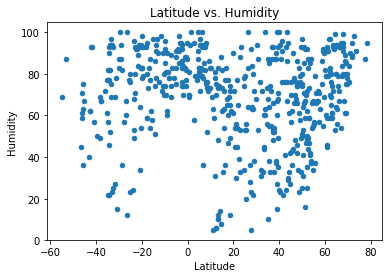

In [8]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title='Latitude vs. Humidity')

plt.savefig('Images/Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

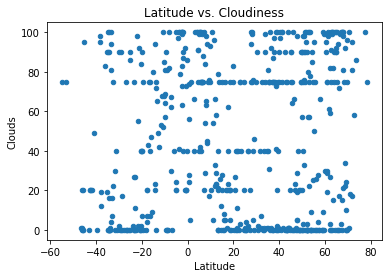

In [9]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs. Cloudiness')

plt.savefig('Images/Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

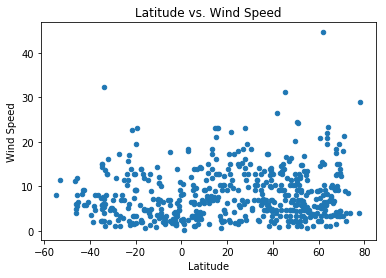

In [10]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')

plt.savefig('Images/Latitude vs. Wind Speed.png')

### Three Observable Trends

#### Analysis:

* According to the Latitude vs. Temperature plot, countries with lower latitudes are hotter i.e. higher in Farenheit
    
* We observe the highest humidity levels at the Equator which has a latitude of 0 since there is a high concentration of points in the Latitude vs. Humidity scatterplot at Latitude 0.
    
* Windspeeds are highest at the higher latitudes as observed in the Latitude vs. Windspeed scatterplot. 